In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading data file
data = pd.read_csv("Leads.csv")

In [5]:
# Checking shape of the data
data.shape

(9240, 37)

In [6]:
# Check the kind of data has in each columns:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
pd.set_option("max_columns", 10000)
data.describe(include = 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,d1f046b4-6a73-4072-9d7f-a1b55264410d,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


#### Removing identifier column from the data, as it doesn't make much sense into Model

In [9]:
data.drop(columns = ['Prospect ID', 'Lead Number' ], inplace = True)

#### Removing variable "Magazine", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "Receive More Updates About Our Courses" as they have single value present. They will not contribute much into model.

In [10]:
data.drop(columns = ["Magazine","Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque", "Receive More Updates About Our Courses"], inplace = True)

In [11]:
data["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

#### Data is not much imbalanced, as we donot have much difference in the ratio of two category

### Checking Null Values 

In [12]:
# Chekcing null values in the dataa
data.isnull().sum() # It contains lot of null values in the data. We will check and remove/fill the null values

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [13]:
## Null value percentage
data.isnull().sum()*100/data.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

#### "Lead Profile" and "How did you hear about X Education ", "Asymmetrique Activity Score", "Asymmetrique Profile Score"  ,"Asymmetrique Activity Index", "Asymmetrique Profile Index" seems to be high null values, We will remove these columns from dataset.


In [14]:
data.drop(columns = ["Lead Profile", "How did you hear about X Education","Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"], inplace = True)

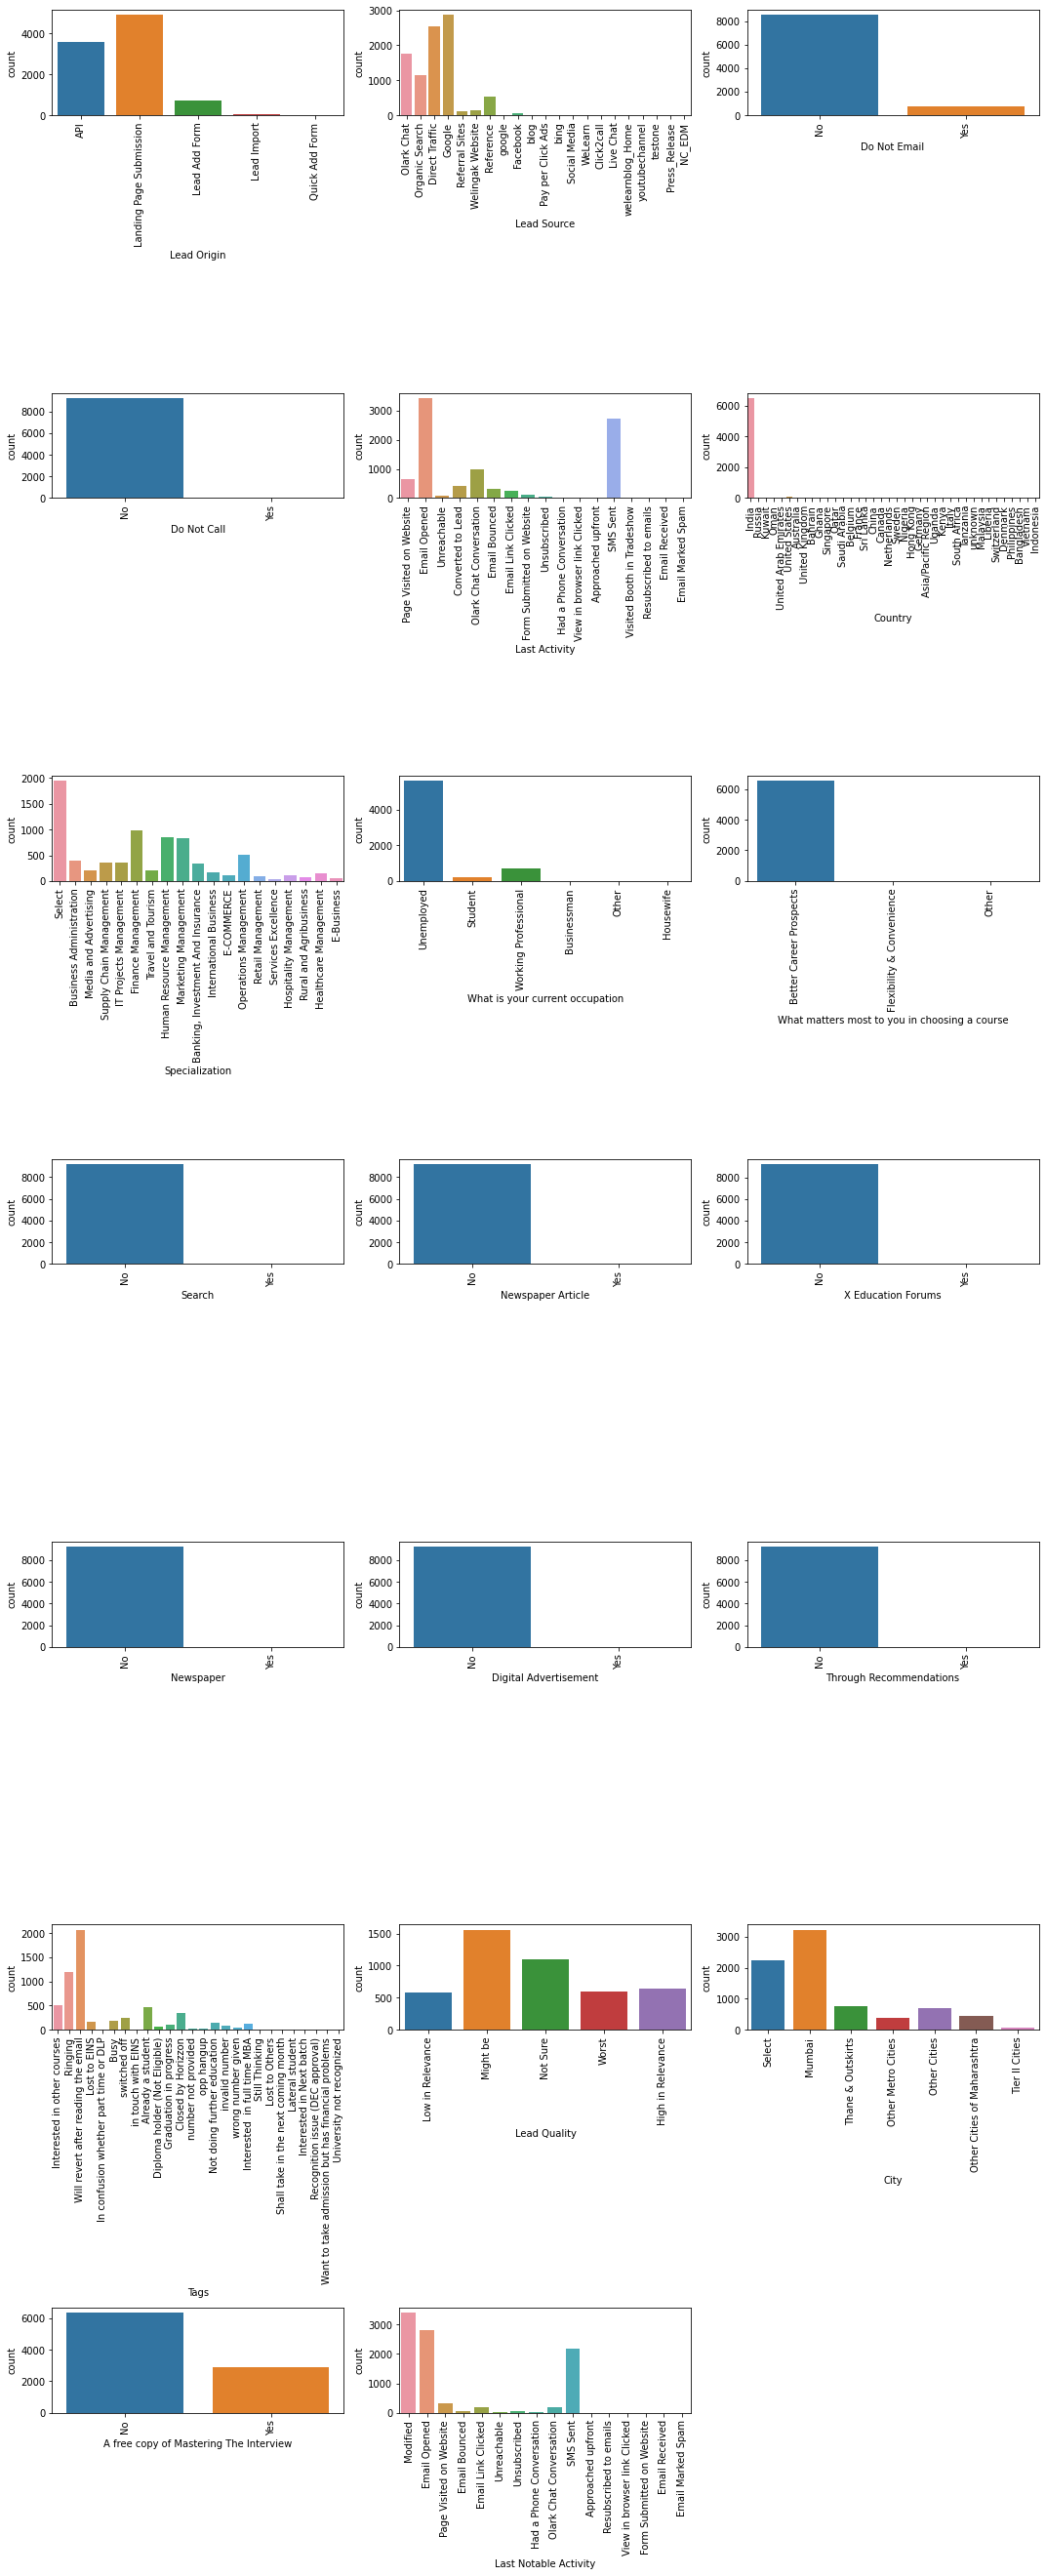

In [15]:
# Plotting each variable for analysis(univariate analysis)
fig = plt.figure(figsize = (15, 40))

j = 1
for i in data.columns:
    if data[i].dtype == "object":
        plt.subplot(8,3,j)
        sns.countplot(data[i])
        plt.xticks(rotation = 90)
        plt.tight_layout()
        j=j+1

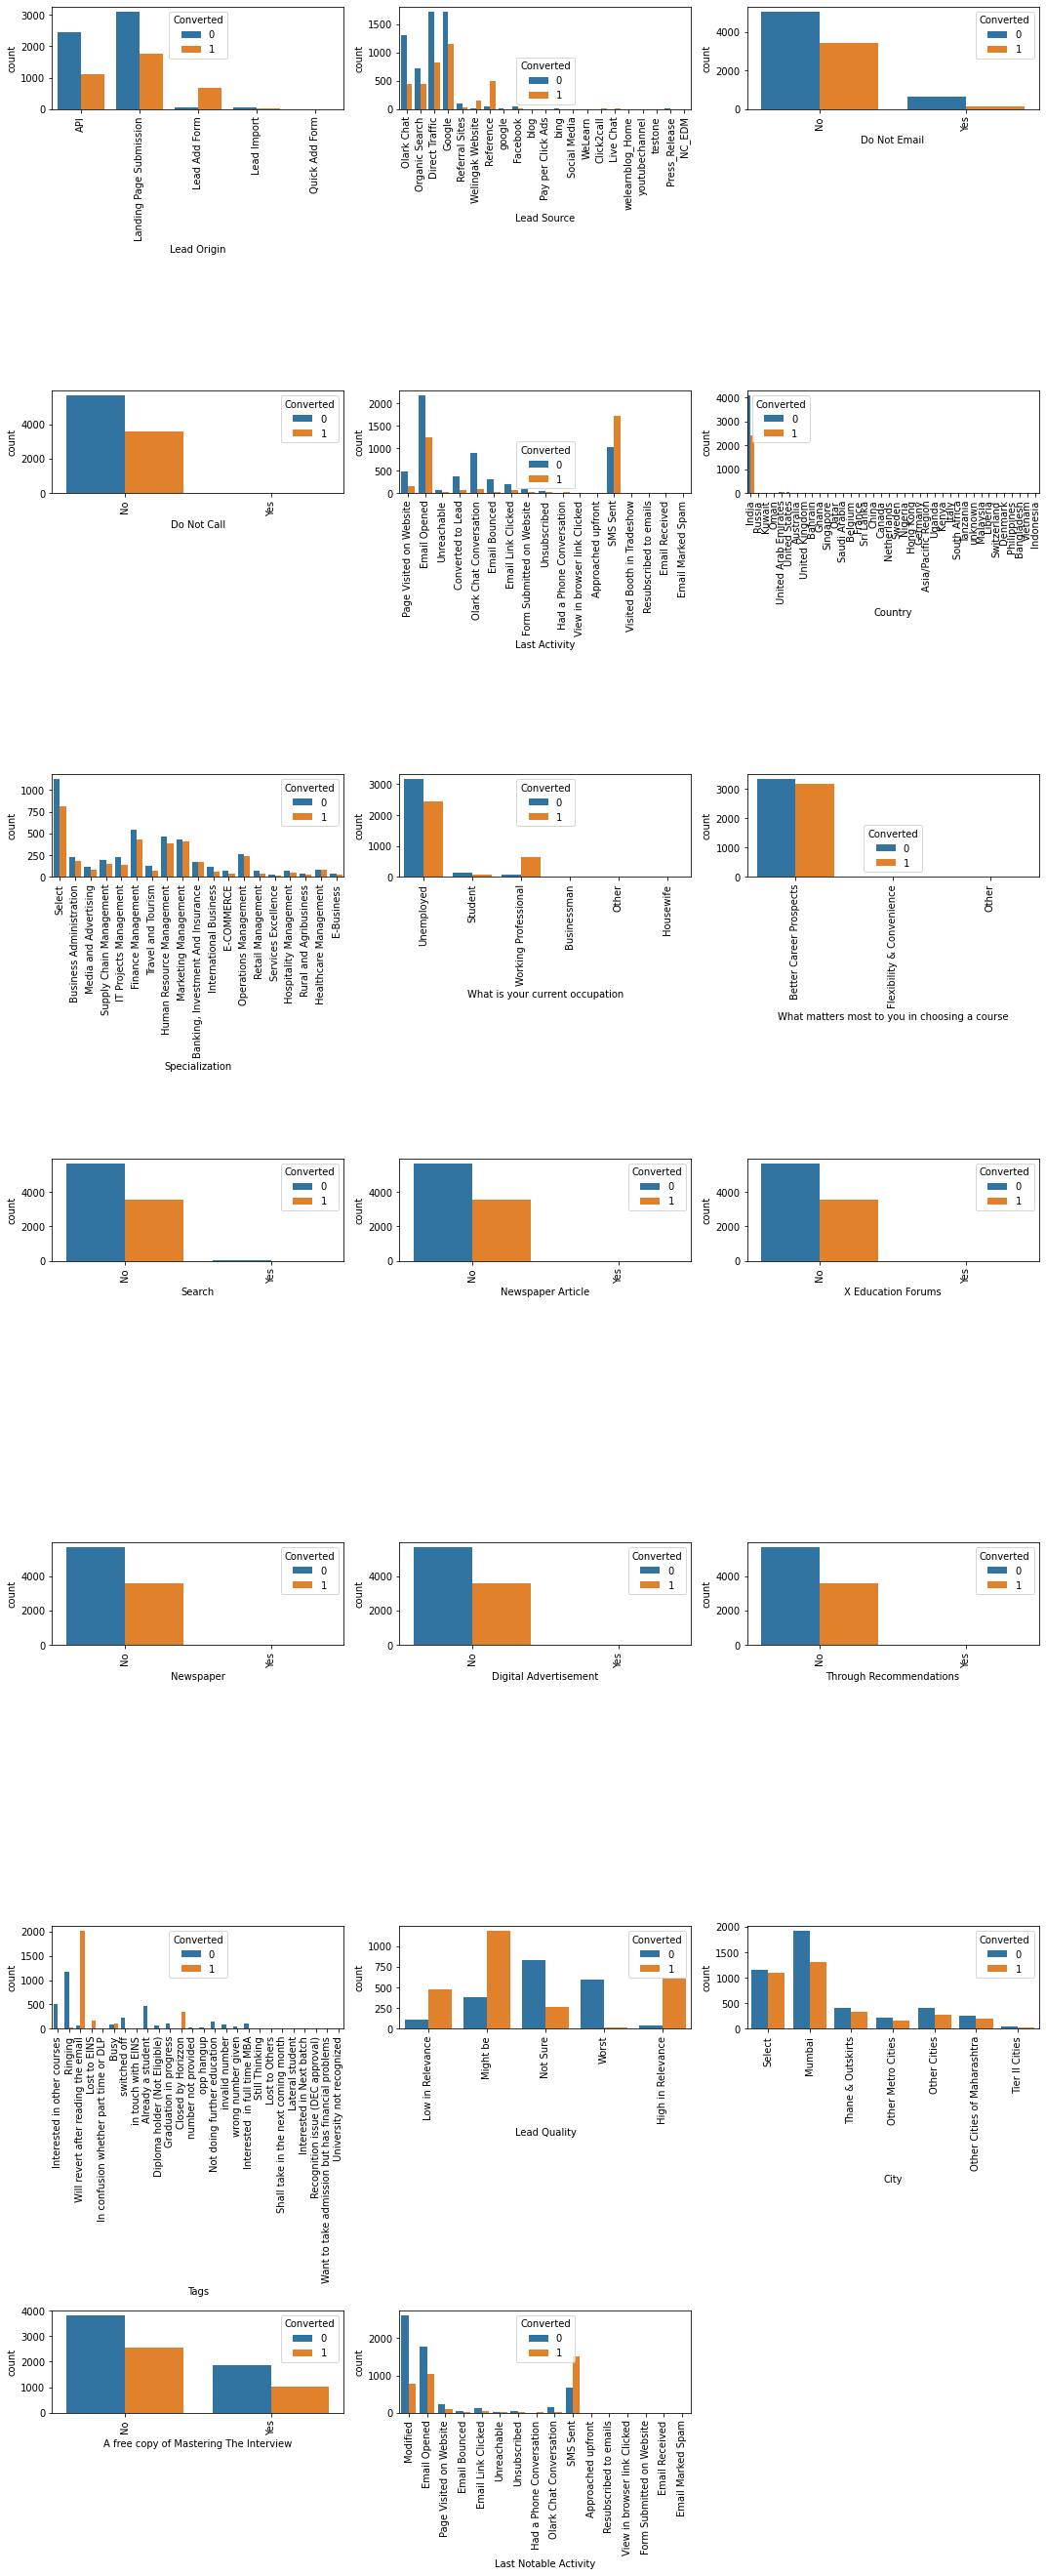

In [16]:
# Plotting for analysis(Bivariate analysis)
fig = plt.figure(figsize = (15, 40))

j = 1
for i in data.columns:
    if data[i].dtype == "object":
        plt.subplot(8,3,j)
        sns.countplot(data[i], hue=data.Converted)
        plt.xticks(rotation = 90)
        plt.tight_layout()
        j=j+1

In [17]:
#### Checking above analysis with numbers:
for i in data.columns:
    if data[i].dtype == "object":
        print(data[i].value_counts())
        print("#####################")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
#####################
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
youtubechannel          1
blog                    1
testone                 1
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64
#####################
No     8506
Yes     734
Name: Do Not Email, dtype: int64
#####################
No     9238
Yes       2
Name: Do Not Call, dtype: int64
#####################
Email Opened                 

#### columns "Search", "Newspaper Article", "X Education Forums", "Newspaper", "What matters most to you in choosing a course" , "Digital Advertisement", "Through Recommendations", "Do Not Call" columns are highly imbalance. So, they will not impact our model

#### Hence, removing these columns

In [18]:
data.drop(columns = ["Do Not Call","What matters most to you in choosing a course", "Search", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations"], inplace = True)

In [19]:
# checking for the relation between cities and country
pd.crosstab(data["City"].fillna("Blank"),  data["Country"].fillna("Blank"), dropna = False)

Country,Asia/Pacific Region,Australia,Bahrain,Bangladesh,Belgium,Blank,Canada,China,Denmark,France,Germany,Ghana,Hong Kong,India,Indonesia,Italy,Kenya,Kuwait,Liberia,Malaysia,Netherlands,Nigeria,Oman,Philippines,Qatar,Russia,Saudi Arabia,Singapore,South Africa,Sri Lanka,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,unknown
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Blank,2,1,0,0,0,838,1,0,0,0,0,1,0,555,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,1,11,0,5
Mumbai,0,6,1,0,1,211,3,1,0,0,1,0,2,2918,0,0,0,2,0,0,1,0,2,1,3,0,7,6,0,0,1,1,0,0,17,6,30,1,0
Other Cities,0,2,2,2,0,55,0,0,1,2,1,1,2,564,0,1,1,2,0,0,0,3,2,1,2,0,9,4,3,0,0,0,0,1,19,0,6,0,0
Other Cities of Maharashtra,0,0,1,0,0,43,0,0,0,2,1,0,2,391,1,0,0,0,0,1,0,0,0,0,1,0,2,2,0,0,0,0,0,0,3,2,5,0,0
Other Metro Cities,0,0,0,0,0,15,0,0,0,2,0,0,0,345,0,0,0,0,1,0,0,1,1,0,1,0,2,2,0,0,0,0,1,0,4,1,4,0,0
Select,0,1,0,0,0,1217,0,1,0,0,0,0,1,999,0,0,0,0,0,0,0,0,1,0,2,1,0,7,0,1,2,0,0,1,6,2,7,0,0
Thane & Outskirts,0,3,2,0,1,80,0,0,0,0,1,0,0,651,0,0,0,0,0,0,1,0,0,0,1,0,1,3,0,0,0,0,0,0,1,2,5,0,0
Tier II Cities,0,0,1,0,0,2,0,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


#### from above crosstab, it seems customer has filled the wrong info. For e.g. if a person belongs to Mumbai, then he/she should belong to India.


In [20]:
# Chekcing for the conversion count for other countries.
pd.crosstab(data["Country"], data["Converted"])

Converted,0,1
Country,,
Asia/Pacific Region,1,1
Australia,10,3
Bahrain,3,4
Bangladesh,1,1
Belgium,2,0
Canada,4,0
China,2,0
Denmark,0,1
France,3,3


#### Dropping coulumn "Country" as they majorly belong to India. Hence unbalanced data.

In [21]:
data.drop(columns = "Country", inplace = True)

#### As we can see on the data that "select" appear on the dataset, we will replace that to empty observation

In [22]:
data.replace("Select", np.nan, inplace = True)

In [23]:
data[data['TotalVisits'].isnull()].isnull().sum()

Lead Origin                                 0
Lead Source                                 7
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                             76
What is your current occupation             7
Tags                                       20
Lead Quality                               38
City                                       69
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

#### many of the column values are blank where TotalVisits/Page Views Per Visit are blank.Also, It only contributes 1.48% of the number of rows.
#### So we will drop the rows.

In [24]:
data.dropna(subset  = ["TotalVisits"], inplace = True)

 Analysing "Last Activity"

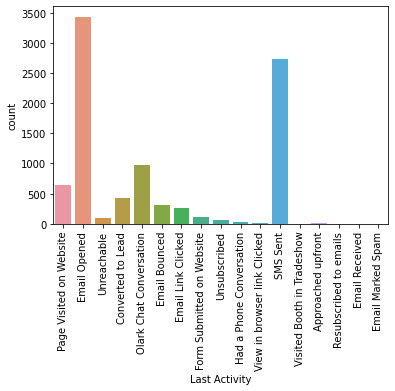

In [25]:
sns.countplot(data = data, x = "Last Activity")
plt.xticks(rotation = 90);

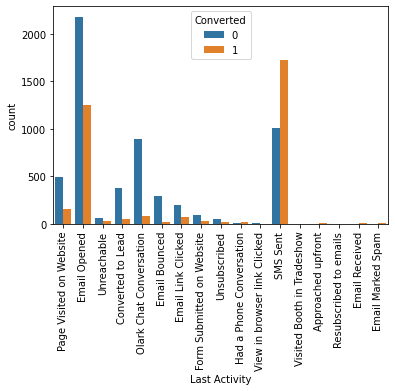

In [26]:
sns.countplot(data = data, x = "Last Activity", hue = "Converted")
plt.xticks(rotation = 90);

#### "SMS Sent" has very high ratio of conversion. Hence company should focus upon the SMS Sending.
#### Binning low frequency in "Lead Activity" , as it contians lot of categorical values.

In [27]:
data["Last Activity"].replace(["Unreachable","Unsubscribed", "Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"], "others", inplace = True)
data["Last Activity"].fillna("others", inplace = True)

#### Analysing "Lead Source"

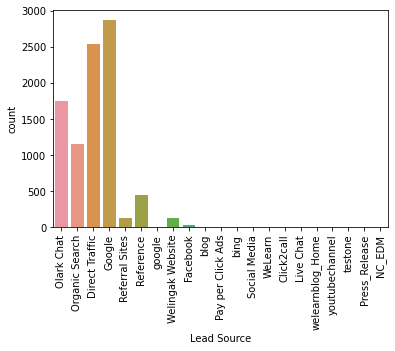

In [28]:
sns.countplot(data = data, x = "Lead Source")
plt.xticks(rotation = 90);

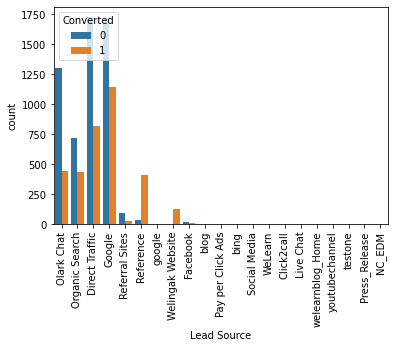

In [29]:
sns.countplot(data = data, x = "Lead Source", hue = "Converted")
plt.xticks(rotation = 90);

#### "Google" search and "Direct Traffic" seems to be highly engaging for lead generation

In [30]:
#Binning low frequency in "Lead Source" , as it contians lot of categorical values.
data['Lead Source'].replace({"google": "Google","Reference":"others",\
                                       "Welingak Website":"others", "Referral Sites":"others", "Facebook":"others",\
                                       "bing":"others", "Click2call":"others", "Press_Release":"others",\
                                      "youtubechannel":"others", "testone":"others", "NC_EDM":"others",\
                                      "welearnblog_Home":"others","WeLearn":"others","Pay per Click Ads":"others",\
                            "Live Chat":"others", "Social Media":"others", "blog":"others"}, inplace = True)
data['Lead Source'].fillna("others", inplace = True)

In [31]:
data["Lead Quality"].value_counts()

Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: Lead Quality, dtype: int64

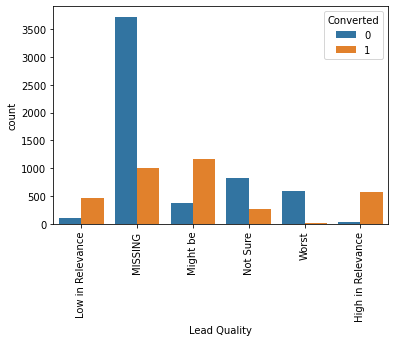

In [32]:
sns.countplot(data = data.fillna("MISSING"), hue = "Converted", x = "Lead Quality")
plt.xticks(rotation = 90);

#### Since missing  values do not resembles to another category, we will create another category.....

In [33]:
data["Lead Quality"].fillna("others", inplace = True)

Analysing CIty

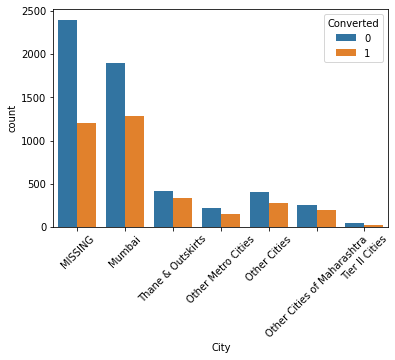

In [34]:
sns.countplot(data = data.fillna("MISSING"), hue = "Converted", x = "City")
plt.xticks(rotation = 45);

Filling Missing value in "City" with mode of the column, i.e. "Mumbai"

Also, Merging "Thane & OutSkirts" with "Other cities of Maharastra", since "Thane" is part of Maharastra.

In [35]:
data["City"].fillna("Mumbai", inplace = True)
data["City"].replace("Thane & Outskirts", "Other Cities of Maharashtra", inplace = True)

Analysing Specialization

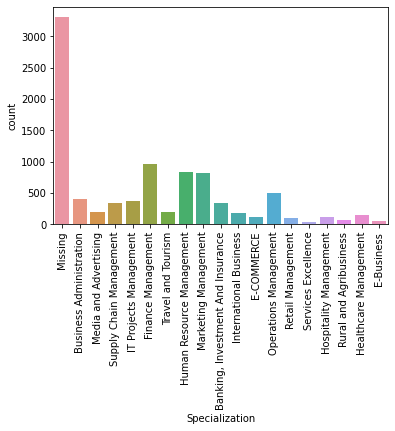

In [36]:
sns.countplot(data["Specialization"].fillna("Missing"))
plt.xticks(rotation = 90);

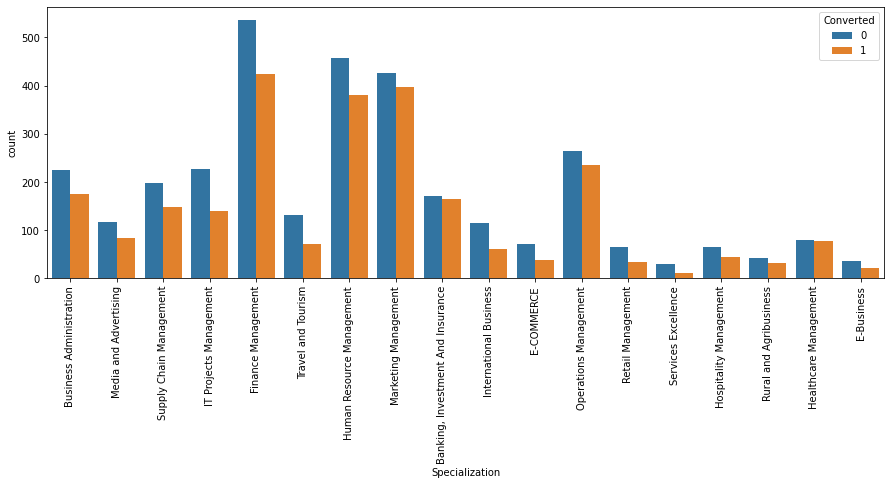

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(data["Specialization"], hue = data["Converted"])
plt.xticks(rotation = 90);

In [38]:
# checking the conversion ratio of each category in specialisation
(data.loc[data["Converted"] ==1,"Specialization"].value_counts()/data["Specialization"].value_counts()).sort_values()

Services Excellence                  0.275000
Retail Management                    0.340000
E-COMMERCE                           0.351351
Travel and Tourism                   0.351485
International Business               0.352273
E-Business                           0.368421
IT Projects Management               0.382514
Hospitality Management               0.405405
Media and Advertising                0.415842
Rural and Agribusiness               0.424658
Supply Chain Management              0.427746
Business Administration              0.438596
Finance Management                   0.441788
Human Resource Management            0.454654
Operations Management                0.470000
Marketing Management                 0.483010
Banking, Investment And Insurance    0.489552
Healthcare Management                0.490446
Name: Specialization, dtype: float64

"Finance Management", "Human Resource Management", "Marketing Management", "Operations Management", "Healthcare Management", "Banking, Investment And Insurance" seems to follow similar trend from above graphs/data

Either of the these are high or have high conversion ratio, imply that they behave similarily in the market.
So, Binng them into a category

In [39]:
data["Specialization"].replace(["Finance Management", "Human Resource Management", "Marketing Management", "Operations Management", "Healthcare Management", "Banking, Investment And Insurance"], "Management", inplace = True)

filling Null vaues in "Specialization" with "Others"

In [40]:
data["Specialization"].fillna("Others", inplace  =True)

Analysing "What is your current occupation"

In [41]:
pd.crosstab(data["Specialization"].fillna("MISSING"), data["What is your current occupation"].fillna("MISSING"))

What is your current occupation,Businessman,Housewife,MISSING,Other,Student,Unemployed,Working Professional
Specialization,,,,,,,
Business Administration,1,1,89,3,6,254,45
E-Business,0,0,14,0,1,40,2
E-COMMERCE,1,0,31,0,1,71,7
Hospitality Management,0,0,21,0,4,68,18
IT Projects Management,1,0,88,0,6,236,35
International Business,0,0,40,0,4,124,8
Management,3,6,757,9,84,2314,443
Media and Advertising,0,2,41,2,1,138,18
Others,2,0,1426,1,85,1760,30


From above crosstab, it seems that the "What is your current occupation" is uncorrelated with "specialisation"

So, we will merge missing values of "What is your current occupation" in "Unemployed"(mode of the variable)

In [42]:
data["What is your current occupation"].fillna("Unemployed", inplace  =True)

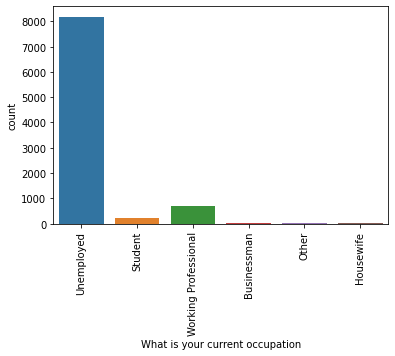

In [43]:
sns.countplot(data["What is your current occupation"].fillna("Missing"))
plt.xticks(rotation = 90);

Analysing "Tags"

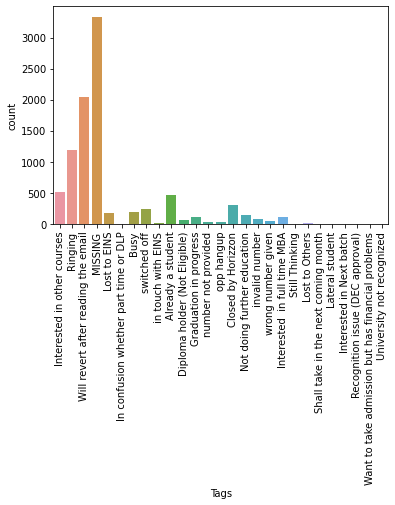

In [44]:
sns.countplot(data = data.fillna("MISSING"),x ="Tags")
plt.xticks(rotation = 90);

large number of missing value is present in the tags

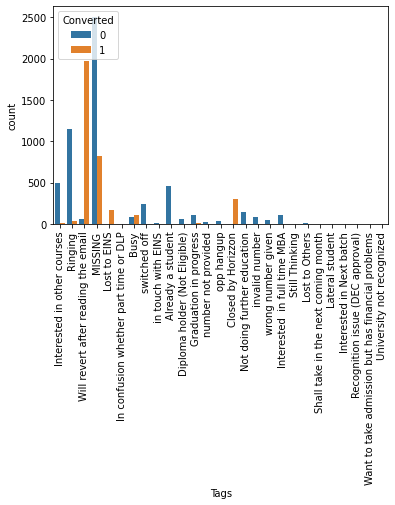

In [45]:
sns.countplot(data = data.fillna("MISSING"),x ="Tags", hue = "Converted")
plt.xticks(rotation = 90);

Excellent conversion ratio is seen in "will revert after reading the email category"

In [46]:
pd.crosstab(data["Tags"].fillna("MISSING"), data["Converted"].fillna("MISSING"))

Converted,0,1
Tags,,
Already a student,462,3
Busy,80,105
Closed by Horizzon,2,299
Diploma holder (Not Eligible),62,1
Graduation in progress,104,7
In confusion whether part time or DLP,4,1
Interested in full time MBA,113,3
Interested in Next batch,0,5
Interested in other courses,496,13


Binning them on the basis of the frequency and converted ratio

In [47]:
data["Tags"].replace(["number not provided", "invalid number", "wrong number given", "switched off", "University not recognized", "Recognition issue (DEC approval)", \
"Lost to Others", "Diploma holder (Not Eligible)", "Shall take in the next coming month", "Still Thinking", "in touch with EINS", "In confusion whether part time or DLP", "Already a student", "Want to take admission but has financial problems", "opp hangup", "Not doing further education", "Interested  in full time MBA", "Graduation in progress"],"Others", inplace = True)

In [48]:
data["Tags"].replace(["Interested in Next batch", "Lateral student", "Lost to EINS", "Closed by Horizzon"], "others2", inplace = True)

In [49]:
# Numbers after Binning

pd.crosstab(data["Tags"].fillna("MISSING"), data["Converted"].fillna("MISSING"))

Converted,0,1
Tags,,
Busy,80,105
Interested in other courses,496,13
MISSING,2507,826
Others,1339,31
Ringing,1155,34
Will revert after reading the email,59,1976
others2,6,476


replacing Null values to "Unspecified"

In [50]:
data["Tags"].fillna("Unspecified", inplace = True)

### Checking Correlation

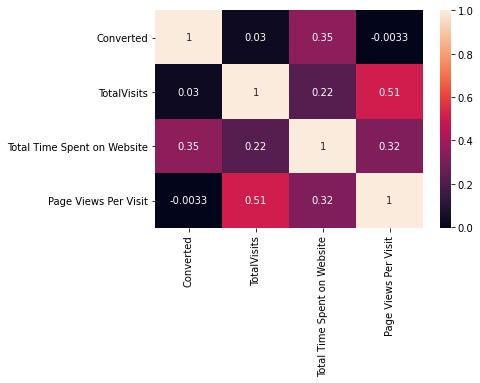

In [51]:
sns.heatmap(data.corr(), annot = True)

The correaltion is acceptable.

### Checking for Outliers

In [52]:
# Checking for outliers in the continuous variables
num_data = data[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]

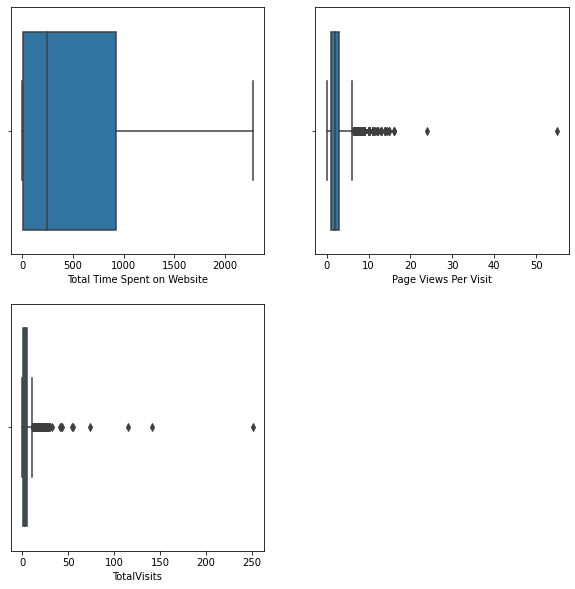

In [53]:
# plotting bar graph to check the outliers
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(data["Total Time Spent on Website"])
plt.subplot(2,2,2)
sns.boxplot(data["Page Views Per Visit"])
plt.subplot(2,2,3)
sns.boxplot(data['TotalVisits'])

In [54]:
data[data["Page Views Per Visit"]>20].shape

(2, 15)

In [55]:
data[data["TotalVisits"]>50].shape

(6, 15)

As we can see only 2 observation above 20 in "page view per visit". We will cap this to 20

Similarly "TotalVisits" only has 6 onservation above 50. We will cap this to 50

"Total time spent on website" don't have any outlier.

In [56]:
data["Page Views Per Visit"] = np.clip(data["Page Views Per Visit"],0,20)

data["TotalVisits"] = np.clip(data["TotalVisits"],0,50)

### Creating Dummy variable

In [57]:
data = pd.get_dummies(data, columns = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Specialization", "What is your current occupation", "Tags", "Lead Quality", "City", "A free copy of Mastering The Interview", "Last Notable Activity"], drop_first = True)

In [58]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ["Converted"]),data["Converted"], train_size=0.7, random_state=1)

### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

# Model Building

In [60]:
from sklearn.linear_model import LogisticRegression

model_Logistic = LogisticRegression(random_state=1)

# Variable Selection(RFE)

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(model_Logistic, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.ranking_

array([28,  1, 40,  6,  1,  2, 31,  1, 30, 19,  4, 42, 36, 23, 22, 11, 39,
        1, 17, 35, 20, 10, 18, 15, 48, 33, 46, 29, 47, 24, 25,  5, 32, 53,
        9,  8, 41,  1,  1,  1, 34,  1,  1, 37, 12, 13,  1,  3, 44, 26, 21,
       14, 45,  7,  1, 51, 54, 52, 43,  1,  1,  1, 38, 49,  1, 16, 27, 50])

In [63]:
data.columns.drop("Converted")[rfe.ranking_ ==1]

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others2',
       'Lead Quality_Worst', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [64]:
X_data = data[['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_SMS Sent',
       'Tags_Interested in other courses', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_others2',
       'Lead Quality_Worst', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent']]

#### Check Multicollinearity

In [65]:
pd.set_option("max_rows", 1000)
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_data.columns
vif['VIF'] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.29
3,Last Activity_SMS Sent,6.04
0,Total Time Spent on Website,1.95
12,Last Notable Activity_Modified,1.93
7,Tags_Will revert after reading the email,1.78
5,Tags_Others,1.64
9,Lead Quality_Worst,1.49
1,Lead Origin_Lead Add Form,1.33
2,Lead Source_Olark Chat,1.31
8,Tags_others2,1.27


We can ignore the Multicollinearity present. As its low and acceptable

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_data,data["Converted"], train_size=0.7, random_state=1)

# Model Fitting

In [67]:
model_Logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
pd.DataFrame(model_Logistic.coef_.T)

,0
0,0.001835
1,3.118901
2,1.059264
3,1.106951
4,-1.380553
5,-2.218962
6,-3.331598
7,4.198544
8,4.633703
9,-1.023378


In [69]:
pred = model_Logistic.predict(X_test)

# Evaluation of Model

#### checking on train dataset

In [70]:
# Checking on train
print(classification_report(y_train,model_Logistic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3954
           1       0.93      0.88      0.90      2418

    accuracy                           0.93      6372
   macro avg       0.93      0.92      0.92      6372
weighted avg       0.93      0.93      0.93      6372



In [71]:
print("Accuracy: ",accuracy_score(y_train,model_Logistic.predict(X_train)))

Accuracy:  0.9278091650973007


#### checking on test dataset

In [72]:
# Checking on test test
print("Accuracy: ",accuracy_score(y_test,pred))
print("#################################")
print(classification_report(y_test,pred))

Accuracy:  0.9311607469791285
#################################
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1688
           1       0.93      0.88      0.91      1043

    accuracy                           0.93      2731
   macro avg       0.93      0.92      0.93      2731
weighted avg       0.93      0.93      0.93      2731



Our F-1 score seems to be 0.93, which is quite good in this case.

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

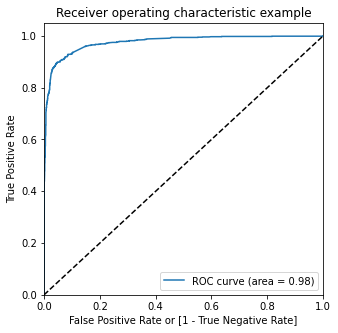

In [74]:
draw_roc(y_test, pd.DataFrame(model_Logistic.predict_proba(X_test))[1])

AUC ROC also coming out to be 0.98, which is quite good number

# Lead Score(0-100)

In [75]:
# These are the number from 0 - 100, by which we can help us decide the lead conversion.

pd.DataFrame(model_Logistic.predict_proba(X_test))[0]*100


0       97.254479
1       93.237179
2       99.834068
3       82.006015
4       99.574728
          ...    
2726    97.407031
2727    99.897351
2728    98.208886
2729    79.375887
2730     0.838833
Name: 0, Length: 2731, dtype: float64